Machine Learning - Homework 1 (due Sep. 13)

Nicholas Thiros

Problem 1: Legal reasoning (from Murphy 2.2).

Suppose a crime has been committed. Blood is found at the scene for which there is no innocent explanation. It is of a type which is present in 1% of the population.

a. The prosecutor claims: “There is a 1% chance that the defendant would have the crime blood type if he
were innocent. Thus there is a 99% chance that he guilty”. This is known as the prosecutor’s fallacy.
What is wrong with this argument?

The prosecutor’s claim is the probability that the defendant has the blood type that matches the crime scene given the defendant is innocent (1%) or guilty (99%).  This is: $ P(\mathrm{Blood Type}|\mathrm{Innocence})$.  This is very much different than the probability that the defendent is innocent (or guilty) given his blood type matches that at the crime scene [$ P(\mathrm{Innocence} | \mathrm{BloodType}) $ ].  The former is the likelihood and the latter is the posterior, which is of actual interest in a case.  The prosecuter has incorrectly attributed these to be equal, which they are likely to not be.  In particular, based on Bayes' Theorem, to translate between these two conditional probabilites, $P(\mathrm{Blood Type}|\mathrm{Innocence})$ must be multiplied by the ratio of the marginal probabilites of innocence and blood type [$\frac{P(Innocence)}{P(BloodType)}$]. Hence, $P(\mathrm{Blood Type}|\mathrm{Innocence})$ = $ P(\mathrm{Innocence} | \mathrm{BloodType}) $ only when  $\frac{P(Innocence)}{P(BloodType)}$= 1.

Therefore, the prosecutor's fallacy is a swapping of conditional probabilities given the joint probability distribution of innocence and blood type [$\mathrm{P(BloodType, Innocence}$].


b. The defender claims: “The crime occurred in a city of 800,000 people. The blood type would be
found in approximately 8000 people. The evidence has provided a probability of just 1 in 8000 that
the defendant is guilty, and thus has no relevance.” This is known as the defender’s fallacy. What is
wrong with this argument?

The defender's claim is not considering that the vast majority of the people who have this blood type are not suspects for the crime.  This claim is assigning all people with a given blood type as equally probable with guilt, which is highly unlikely and improbable.  The argument is failing to incorporate any prior information into the estimate of guilt. In a sense, this is a fallacy because it is suggesting that this blood fit is irrelevant.  However, only 1% of the population has this blood type so it is, in fact, a strong piece of evidence that needs to be included in the evaluation on whether the suspect is guilty provided he has the blood type.



c. Suppose that forensic analysis tells us that that the blood test has 98% sensitivity (true positive rate) and a 1% false positive rate. Given the information presented in the above two questions, determine the posterior probability the the defendent is guilty, given that the defendent's blood type matches that found at the crime scene and that the defendent was one of only 5 people with access to the crime scene and that there is no other evidence.

To come up with the probability that the suspect is guilty we need to use Bayes’ theorem: 

$$\mathrm{P(Guilt=1|BloodType=1)}=\frac{\mathrm{P(BloodType=1|Guilt=1)*P(Guilt=1)}}{\mathrm{P(BloodType=1)}}$$

In this equation the likelihood is equal to 98%, the probability that the guilty suspect has a given blood type.  To determine the prior, we must consider that the suspect was one of only five people with access to the crime scene.  This indicates the suspect has a 20% chance of being guilty before any blood results are considered. The denominator of Bayes can be marginalized to the following equation: 

$$\mathrm{P(BloodType=1|Guilt=1)P(Guilt=1)+P(BloodType=1|Guilt=0)P(Guilt=0)}$$

with $$ \mathrm{P(Guilt=0) = 1 - P(Guilt=1)} \; \mathrm{and} \; \mathrm{P(BloodType=1|Guilt=0)=0.01} $$

Evauluating this expression results in a 96% probablilty that the suspect is guilty given his blood type and he was one of five suspects.


In [72]:
prior = 1./5
tru_pos = 0.98 #True Positive
fal_pos = 0.01 #False Positive

posterior =  tru_pos*prior/(tru_pos*prior + fal_pos*(1-prior))

print("probablility of guilt = %.2f " % (posterior))

probablility of guilt = 0.96 


Problem 2: Naive Bayes.

One use of the naive Bayes classifier, which is still in practical use today, is as a spam filter.  Consider the corpus of text messages packaged with this homework, which are each labelled as either 'spam' or 'ham'.  In this case, naive Bayes utilizes a Bernoulli model that quantifies the probability of a given word given that the message is either spam or ham.  For example, investigating the text messages here, we find that the word *draw* shows up in spam 27 times, yet in ham only 5.  Thus, we have that
$$ P(X=\mathrm{draw}|Y=\mathrm{ham}) = \frac{5}{5+27}. $$

While this is not particularly strong evidence on its own, we can create a powerful classifier by using the naive assumption in conjunction with all the words in a given message:
$$ P(Y=\mathrm{ham}|\hat{X}) \propto P(Y=\mathrm{ham}) \prod_{i=1}^n P(X=x_i|Y=\mathrm{ham}), $$
$$ P(Y=\mathrm{spam}|\hat{X}) \propto P(Y=\mathrm{spam}) \prod_{i=1}^n P(X=x_i|Y=\mathrm{spam}), $$
where $x_i$ are the words in a given message. 

Your task is to write such a classifier.  I have taken the somewhat tedious step of parsing the data for you, yielding the variables *word_dictionary*, which contains the ham and spam counts for each word, as well as *training_labels*, which provides the spam/ham labels for each text message.  I have also parsed a set of test data: *test_messages* is a list, each entry containing another list of the words in the text message, as well as *test_labels* which contains the spam/ham label for each message.

In [73]:
import numpy as np

# Maps from 'ham' or 'spam' strings to zero or one
def mapper(s):
    if s=='spam':
        return 0
    else:
        return 1

# Read in the text file
f = open('SMSSpamCollection','r')
lines = f.readlines()

# Break out the test data
test_lines = lines[:len(lines)//5]  #why the 5? - I think we are going to use 80% as training data and 20% as verification data
lines = lines[len(lines)//5:] #this should be the training data (80%) - above is verification data (20%)

# Instantiate the frequency dictionary and an array to
# record whether the line is ham or spam
word_dictionary = {}
training_labels = np.zeros(len(lines),dtype=int)

# Loop over all the training messages
for i,l in enumerate(lines):
    # Split into words
    l = l.lower().split()
    # Record the special first word which always ham or spam
    if l[0]=='ham':
        training_labels[i] = 1
    # For each word in the message, record whether the message was ham or spam
    for w in l[1:]:
        # If we've never seen the word before, add a new dictionary entry
        if w not in word_dictionary:
            word_dictionary[w] = [1,1]
        word_dictionary[w][mapper(l[0])] += 1
        
# Loop over the test messages
test_labels = np.zeros(len(test_lines),dtype=int)
test_messages = []
for i,l in enumerate(test_lines):
    l = l.lower().split()
    if l[0]=='ham':
        test_labels[i] = 1
    test_messages.append(l)
    
#print(training_labels)
#print(training_labels.shape)
#print(len(training_labels))

Below, I have provided code skeletons.  Your job is to make the code skeletons into an operational naive Bayes spam detector.  (you may discard these skeletons if you would prefer to code this from scratch).  Note that lines where you will need to change the code are marked with a '#!'.

Your first task is train the model:  

In [74]:
#What is the prior P(Y=ham) ?
ham_prior = np.zeros([2]) #two because classes are either 0 or 1 (0 is spam 1 is ham)
for i in [0,1]:
    ham_prior[i] = len(training_labels[training_labels==i])/len(training_labels)
    #ham_prior[0] is the spam prior
    #ham_prior[1] is the ham prior

print('Prior Probability of Ham = %.4f' % ham_prior[1])
#print("Prior Probability of Spam = %.4f \nPrior Probability of Ham = %.4f" %(ham_prior[0], ham_prior[1]))


# What are the class probabilities P(X=word|Y=ham) for each word?
ham_likelihood = {}
for key,val in word_dictionary.items():
    #print(key)
    #print(val)
    ham_likelihood[key] = val[1]/(val[0]+val[1])


Prior Probability of Ham = 0.8702



The prior probability of a message being Ham is simply the total number of labeled ham messages in the training set divided by the total number of messages in the training set. 87% percent of the training set messages are ham. 
The likelihood that a given word is from a ham message is the total number of times that the word has shown up in the ham messages from the training set divided by the total number of times that word has shown up (Ham + Spam).



Your next task is to make predictions on a set of test examples which were held back from the training procedure (see *test_messages* variable).  For each of these messages, compute the ham and spam probabilities.

In [75]:
# Where to hold the ham and spam posteriors
posteriors = np.zeros((len(test_lines),2))

# Loop over all the messages in the test set
for i,m in enumerate(test_messages):
    #print(m)
    
    posterior_ham = 1.0 * ham_prior[1]
    posterior_spam = 1.0 * (1 - ham_prior[1])
    #! Don't forget to include the prior!
    # Loop over all the words in each message
    for w in m:
        # #! What is the purpose of this try/except handler?
        try:
            posterior_ham *=  ham_likelihood[w]
            posterior_spam *=  (1 - ham_likelihood[w])
        except KeyError:
            pass
    
    # Notice the normalization factor (denominator) 
    # to turn these into proper probabilities!
    posteriors[i,0] = posterior_spam/(posterior_spam + posterior_ham)
    posteriors[i,1] = posterior_ham/(posterior_spam + posterior_ham)
    
    #posteriors[:,0] = spam posterior
    #posteriors[:,1] = ham posteriors
    


Finally, make a ham/spam prediction based on your posterior probabilities.  Compare these to the labels contained in test_labels.  Report the accuracy of your classifier as percentage correct.

In [76]:

ham_predict = np.zeros_like(posteriors[:,1])
for i in np.arange(len(posteriors[:,1])):
    if posteriors[i,1] >= 0.5:  #if the posterior of ham is greater than or equal to 50% classify message as ham
        ham_predict[i] = int(1)
    else:
        ham_predict[i] =  int(0) #if the posterior of ham is less than 50% classify the message as spam
        
num_correct = 0
for i in np.arange(len(ham_predict)):
        if int(ham_predict[i]) == int(test_labels[i]):
            num_correct += 1
            
percent_correct = num_correct/len(ham_predict)

print("Percent of messeges classified correctly = %.4f" % percent_correct)

Percent of messeges classified correctly = 0.9390


To make the ham/spam prediction based on posterior probabilities a decision rule must be created.  This decision rule says that if a given message has a ham posterior greater than or equal to X, classify the message as ham, otherwise classify it as spam.  This decision rule is subjective.  With a decision rule of 0.5, our naive Bayes classifier correctly identifies 94% of the test messages.  

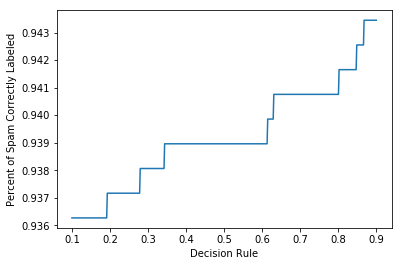

In [77]:
#Try to optimize the decision rule 
import matplotlib.pyplot as plt

percent_correct = np.array([])
dec_rule = np.linspace(0.1,0.9,500)
for j in dec_rule:
    ham_predict = np.zeros_like(posteriors[:,1])
    
    for i in np.arange(len(posteriors[:,1])):
        if posteriors[i,1] >= j:
            ham_predict[i] = int(1)
        else:
            ham_predict[i] =  int(0)
    num_correct = 0    
    for z in np.arange(len(ham_predict)):
        if int(ham_predict[z]) == int(test_labels[z]):
            num_correct += 1
    per_cor = num_correct/len(ham_predict)
    percent_correct = np.append(percent_correct, per_cor)
        

plt.plot(dec_rule, percent_correct)
plt.xlabel('Decision Rule')
plt.ylabel('Percent of Spam Correctly Labeled')
plt.show()

Given we know the actual classification of the test messages, we can try and optimize decision rule that was subjectively chosen in the above problem.  However, when comparing the percent of messages correctly identified vs. many decision rules, there does not seem to be a clear maximum.  This plot would then indicate the more weight you give to the ham posterior, the better the classifier prediction becomes.  However, the range in percent correctly identified is 0.7%.  This indicates that the classifier with the associated training set is robust in classifying the messages correctly.

A potential reason for this robustness (or rather, a consequence of the robustness) can be seen below.  This plot shows that the vast majority of the messages have a posterior of being classified as ham that is near 1.  This indicates that no matter what the decision rule is, most of the message will be classified as ham.  Additionally, any decision rule that is in the mid-latitudes of this plot (posterior of 0.1 to 0.9) has a tiny number of points that will hardly alter the prediction (or not at all, for example, there are 0 points with a posterior between ~0.3 to ~0.6). 

Given these posteriors are not randomly distributed, it now makes sense why I did not get the expected bell-shaped plot of percent correct vs decision rule in the above plot.


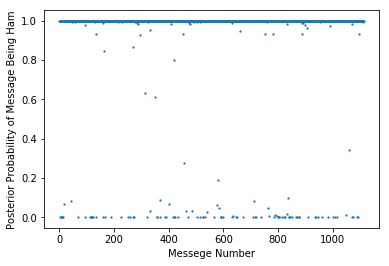

In [78]:
#plot of the posteriors for all the test data
messages = np.arange(0, len(posteriors[:,1]))

plt.scatter(messages, posteriors[:,1], s=1.5, label='Ham') 
#plt.scatter(messages, posteriors[:,0], s=1.2, label='Spam') 
plt.xlabel('Messege Number')
plt.ylabel('Posterior Probability of Message Being Ham')
#plt.legend(loc='best')
plt.show()